<a href="https://colab.research.google.com/github/Eber1126/CPE-490-Final-Project/blob/main/Eber_Veracruz_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4/4 [==============================] - 0s 3ms/step
Test R-squared: 0.7892386570757782
Explained Variance Score (XGBoost): 0.7910917220753216


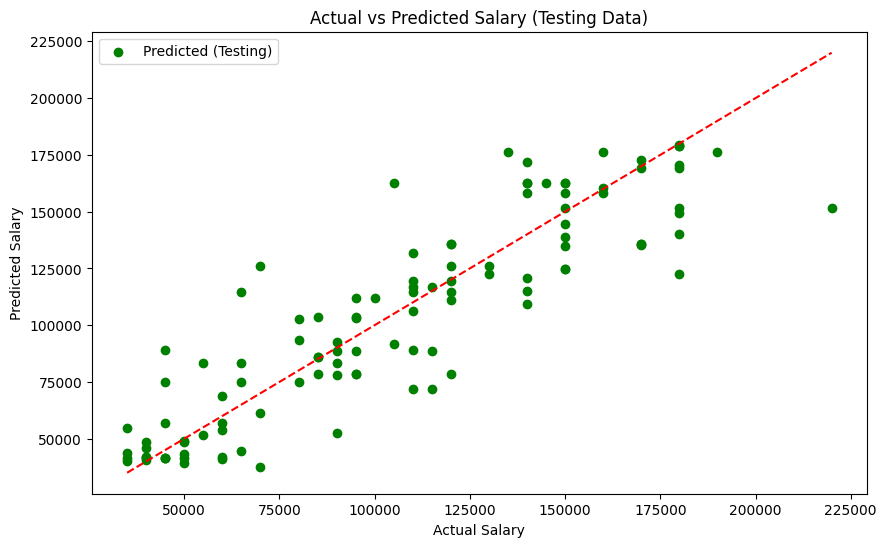

In [8]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.initializers import HeNormal
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics

TensorBoard = TensorBoard(log_dir='./logs', histogram_freq=1)

# Read in the data set
Salary = pd.read_csv("Salary Data.csv")

# Bachelor's = 0, Master's = 1, Phd = 2
lvl_edu = LabelEncoder()
Salary["Education Level"] = lvl_edu.fit_transform(Salary["Education Level"])
Salary["Gender"] = lvl_edu.fit_transform(Salary["Gender"])
Salary["Job Title"] = lvl_edu.fit_transform(Salary["Job Title"])

# drop any data that is not available
Salary.dropna(subset=['Salary'], inplace=True)

# drop Salary because that is the value we are trying to predict
X = Salary.drop("Salary", axis=1)
Y = Salary["Salary"]

# Splitting the dataset into training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, random_state=10)

# Standardize all the features
Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

# we create the model for the neural netwok
model = Sequential([
    Dense(64, activation='relu', kernel_initializer=HeNormal(), input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

model.fit(X_train_scaled, Y_train, epochs=500, batch_size=32, validation_data=(X_test_scaled, Y_test), callbacks=[TensorBoard], verbose=0)

# Predictions from the neural network created above
nn_pred_train = model.predict(X_train_scaled)
nn_pred_test = model.predict(X_test_scaled)

# Initialize the XGBoost Model
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'booster' : 'gbtree' ,
    'tree_method': 'hist',
    'verbosity': 0
}

# Using the nueral network predictions, we use those to train the XGBoost model
train_nn = xgb.DMatrix(nn_pred_train, label=Y_train)
test_nn = xgb.DMatrix(nn_pred_test, label=Y_test)

gbnn_model = xgb.train(params, train_nn, 50, evals= [(test_nn, 'test')], verbose_eval=False)

# Make predictions using the new GBNN model
xgb_pred_train = gbnn_model.predict(train_nn)
xgb_pred_test = gbnn_model.predict(test_nn)

# Calculate R-squared
r2_test = sklearn.metrics.r2_score(Y_test, xgb_pred_test)
print("Test R-squared:", r2_test)

# Calculate explained variance score
explained_variance_xgb = sklearn.metrics.explained_variance_score(Y_test, xgb_pred_test)
print("Explained Variance Score (XGBoost):", explained_variance_xgb)

import matplotlib.pyplot as plt
# Plots the predicted salaries against the actual salaries using the testing dataset
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, xgb_pred_test, color='green', label='Predicted (Testing)')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary (Testing Data)')
plt.legend()
plt.show()


Code Snippet of the same dataset but using only a Neural Network Model

3/3 [==============================] - 0s 4ms/step
R-squared: 0.7843927093463411
Explained Variance Score (Neural Network): 0.7973982879590931


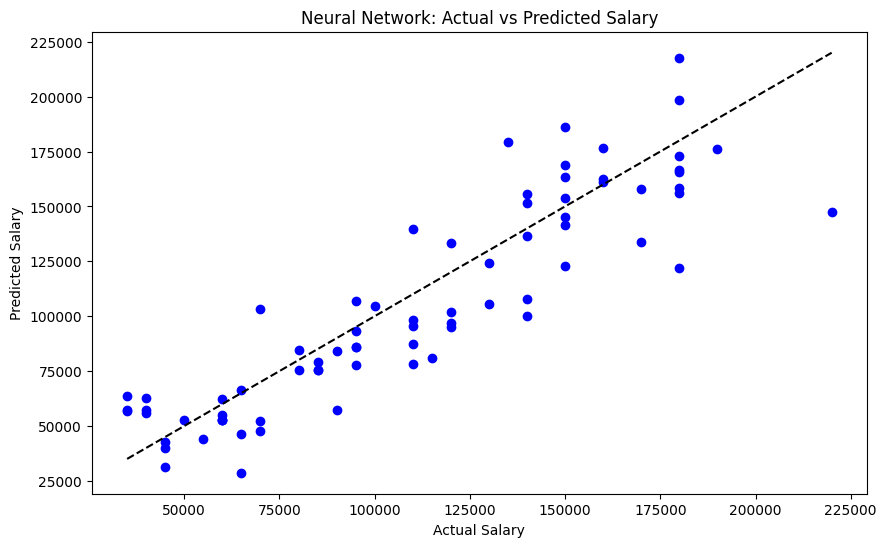

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import sklearn.metrics

# Read in the data set
Salary = pd.read_csv("Salary Data.csv")

# Bachelor's = 0, Master's = 1, Phd = 2
lvl_edu = LabelEncoder()
Salary["Education Level"] = lvl_edu.fit_transform(Salary["Education Level"])
Salary["Gender"] = lvl_edu.fit_transform(Salary["Gender"])
Salary["Job Title"] = lvl_edu.fit_transform(Salary["Job Title"])

# drop any data that is not available
Salary.dropna(subset=['Salary'], inplace=True)

# drop Salary because that is the value we are trying to predict
X = Salary.drop("Salary", axis=1)
Y = Salary["Salary"]

# Splitting the dataset into training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

# Standardize all the features
Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

# Neural Network Model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

nn_model.compile(optimizer=Adam(), loss='mean_squared_error')
history_nn = nn_model.fit(X_train_scaled, Y_train, epochs=500, batch_size=32, validation_data=(X_test_scaled, Y_test), verbose=0)

# Predictions
nn_pred_test = nn_model.predict(X_test_scaled).ravel()


# R-squared (R2)
r2_nn = sklearn.metrics.r2_score(Y_test, nn_pred_test)
print("R-squared:", r2_nn)

# Calculate explained variance score for neural network model
explained_variance_nn = sklearn.metrics.explained_variance_score(Y_test, nn_pred_test)
print("Explained Variance Score (Neural Network):", explained_variance_nn)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, nn_pred_test, color='blue')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='black', linestyle='--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Neural Network: Actual vs Predicted Salary')
plt.show()


Gradient Boosting Model using the same dataset

R-squared: 0.9340608523533662
Explained Variance Score (XGBoost): 0.9342480830804495


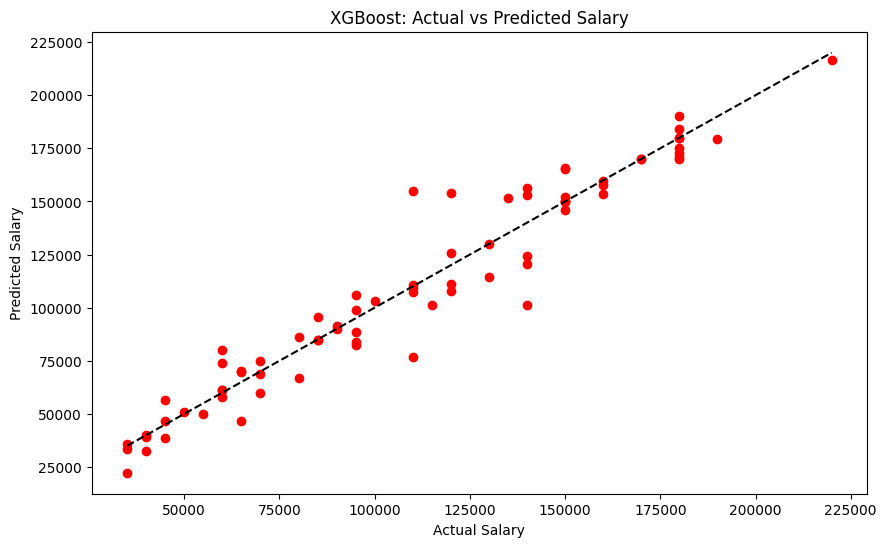

In [10]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import sklearn.metrics

# Read in the data set
Salary = pd.read_csv("Salary Data.csv")

# Bachelor's = 0, Master's = 1, Phd = 2
lvl_edu = LabelEncoder()
Salary["Education Level"] = lvl_edu.fit_transform(Salary["Education Level"])
Salary["Gender"] = lvl_edu.fit_transform(Salary["Gender"])
Salary["Job Title"] = lvl_edu.fit_transform(Salary["Job Title"])

# drop any data that is not available
Salary.dropna(subset=['Salary'], inplace=True)

# drop Salary because that is the value we are trying to predict
X = Salary.drop("Salary", axis=1)
Y = Salary["Salary"]

# Splitting the dataset into training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

# Standardize all the features
Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

# XGBoost Model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse', booster='gbtree')

xgb_model.fit(X_train_scaled, Y_train)

# Predictions
xgb_pred_test = xgb_model.predict(X_test_scaled)

# R-squared (R2)
r2_xgb = sklearn.metrics.r2_score(Y_test, xgb_pred_test)
print("R-squared:", r2_xgb)

# Calculate explained variance score for XGBoost model
explained_variance_xgb = sklearn.metrics.explained_variance_score(Y_test, xgb_pred_test)
print("Explained Variance Score (XGBoost):", explained_variance_xgb)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, xgb_pred_test, color='red')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='black', linestyle='--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('XGBoost: Actual vs Predicted Salary')
plt.show()
